<a href="https://colab.research.google.com/github/ashbyp/alecto/blob/master/notebooks/momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.5 MB/s 
     |████████████████████████████████| 112 kB 9.7 MB/s 
     |████████████████████████████████| 128 kB 58.2 MB/s 
     |████████████████████████████████| 110 kB 54.3 MB/s 
     |████████████████████████████████| 4.0 MB 54.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
nasdaq = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]
nasdaq_tickers = nasdaq.Ticker.to_list()
print(nasdaq_tickers)
print(len(nasdaq_tickers))


['ATVI', 'ADBE', 'ADP', 'ABNB', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'AZN', 'TEAM', 'ADSK', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CHTR', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DLTR', 'EBAY', 'EA', 'ENPH', 'EXC', 'FAST', 'FISV', 'FTNT', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LCID', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'RIVN', 'ROST', 'SGEN', 'SIRI', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL', 'ZM', 'ZS']
101


In [ ]:
prices = yf.download(nasdaq_tickers, start="2009-01-01")['Adj Close']#.dropna(axis=1)
prices


[*********************100%***********************]  101 of 101 completed


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SBUX,SGEN,SIRI,SNPS,TMUS,TXN,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,2.762747,23.020000,13.858873,25.052748,20.680000,19.485903,8.890000,8.282956,2.380000,44.219185,...,3.951461,9.120000,0.107044,18.930000,24.624426,11.308820,30.690001,17.748911,7.485948,11.481795
2009-01-05,2.879346,23.129999,13.788414,24.798569,20.879999,19.308235,9.250000,8.282956,2.670000,44.713917,...,3.983586,9.210000,0.115965,18.840000,25.751249,11.181911,32.150002,18.645041,7.562596,11.372091
2009-01-06,2.831855,24.219999,14.457761,25.300739,20.850000,18.975832,9.600000,8.989372,2.780000,43.731945,...,4.104057,9.470000,0.124885,19.180000,28.104322,11.597883,31.629999,18.554735,7.659683,11.225828
2009-01-07,2.770662,24.230000,13.915239,24.866753,20.070000,18.769512,9.360000,8.228616,2.660000,43.626991,...,4.011696,9.250000,0.124885,19.219999,29.098579,10.984499,31.520000,18.777031,7.439959,11.110033
2009-01-08,2.822112,24.290001,13.929335,25.176743,19.200001,19.073256,9.010000,8.337296,2.740000,44.421581,...,4.071933,9.400000,0.115965,19.540001,29.413429,10.772989,31.770000,18.645041,7.705672,11.256303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,338.450012,163.839996,240.940002,188.160004,95.690002,203.669998,97.220001,64.519997,263.920013,...,98.269997,127.019997,5.840000,320.209991,140.020004,164.380005,289.690002,38.630001,9.170000,70.446365
2022-12-27,130.029999,335.089996,162.199997,241.029999,186.289993,96.290001,204.589996,95.339996,63.270000,263.390015,...,99.199997,125.010002,5.780000,317.950012,140.990005,163.779999,287.320007,38.310001,9.230000,71.082001
2022-12-28,126.040001,328.329987,160.279999,237.850006,181.899994,95.360001,201.580002,94.230003,62.570000,261.420013,...,98.599998,125.139999,5.730000,315.309998,138.979996,161.190002,285.760010,37.580002,8.870000,70.570000


In [ ]:
mtl = (prices.pct_change() +1) [1:].resample('M').prod()
#prices.head(4)
mtl.head()
#1 + ((2.879346 - 2.762747) / 2.762747)


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SBUX,SGEN,SIRI,SNPS,TMUS,TXN,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,0.993169,0.838836,1.015760,0.899035,0.800774,0.922059,0.886389,0.878163,0.920168,0.929819,...,0.959350,1.106360,1.000000,0.977285,0.914536,0.938790,1.076898,1.072798,0.989761,0.979830
2009-02-28,0.990902,0.864837,0.932933,0.939994,0.766304,0.905779,0.869289,0.988740,0.995434,0.892069,...,0.969280,0.795837,1.333333,1.007027,1.066961,0.959866,0.911952,0.874145,1.069655,0.960997
2009-03-31,1.177024,1.280838,1.045260,1.039486,1.324665,0.900535,1.157664,1.167210,1.399083,1.012058,...,1.214207,1.227895,2.187500,1.112721,1.177931,1.150523,0.953218,1.088014,1.032882,1.063656
2009-04-30,1.197014,1.278635,1.104307,1.001138,1.186199,1.044339,1.564943,1.135814,1.183607,0.978796,...,1.301531,0.936105,1.114286,1.050651,1.000585,1.100814,1.072746,1.210709,1.185393,0.989802
2009-05-31,1.079313,1.030347,1.156866,1.079830,1.076229,1.014049,0.953264,0.926916,1.257618,1.030328,...,0.995159,0.995666,0.897436,0.894398,1.002340,1.074197,0.965931,0.951322,1.182201,0.930044


In [ ]:
def get_rolling_ref(df, n):
    return df.rolling(n).apply(np.prod)


m12 = get_rolling_ref(mtl, 12)
m6 = get_rolling_ref(mtl, 6)
m3 = get_rolling_ref(mtl, 3)

m3


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SBUX,SGEN,SIRI,SNPS,TMUS,TXN,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2009-03-31,1.158347,0.929192,0.990526,0.878457,0.812863,0.752111,0.892013,1.013459,1.281513,0.839465,...,1.129065,1.081140,2.916666,1.095087,1.149394,1.036751,0.936136,1.020319,1.093515,1.001553
2009-04-30,1.396095,1.416365,1.076873,0.978223,1.204106,0.851852,1.574873,1.310805,1.648402,0.883682,...,1.531780,0.914767,3.250000,1.177297,1.257542,1.215681,0.932526,1.151483,1.309655,1.011745
2009-05-31,1.520658,1.687425,1.335355,1.123746,1.691095,0.953676,1.727007,1.228843,2.082569,1.020641,...,1.572678,1.144458,2.187500,1.045625,1.181379,1.360483,0.987724,1.253146,1.447453,0.979158
2009-06-30,1.354928,1.323048,1.296900,1.016724,1.129090,1.161535,1.336696,1.029429,1.268852,1.069063,...,1.250225,0.985801,1.228572,0.941148,0.779274,1.298302,1.252001,1.136696,1.405119,1.001660
2009-07-31,1.298497,1.185375,1.297150,1.067436,1.093781,1.191912,0.879130,1.136007,1.013850,1.285538,...,1.224066,1.305526,1.153846,0.917355,0.693388,1.337755,1.168397,0.991559,1.290153,1.096084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.057769,0.896658,0.904153,1.101511,0.971071,0.989778,0.877755,0.804080,0.833202,0.943195,...,1.077057,1.137161,0.954688,1.084022,1.080051,0.940813,1.048800,0.809415,0.717615,0.992615
2022-09-30,1.012229,0.751789,0.958386,1.081544,1.086299,0.908162,0.875100,0.902831,0.828560,0.933583,...,1.109309,0.773313,0.934544,1.005960,0.997250,1.013989,1.027503,0.838342,0.856930,0.910383
2022-10-31,0.944883,0.776602,0.833371,1.006737,0.990662,0.899052,0.691533,0.835212,0.635757,1.100892,...,1.027169,0.706523,0.907161,0.796054,1.059416,0.905086,1.112656,0.932200,0.866667,0.895545


In [ ]:
top_50 = m12.loc['2022-11-30'].nlargest(50)
top_50_tickers = top_50.index

top_50

VRTX    1.692522
AMGN    1.485550
TMUS    1.391968
ORLY    1.354739
GILD    1.334797
PCAR    1.310878
BIIB    1.294519
BKR     1.276064
ATVI    1.269446
AZN     1.269053
AEP     1.235272
MNST    1.227739
PEP     1.192713
REGN    1.180934
MDLZ    1.174004
ADP     1.165335
KDP     1.161559
EXC     1.135169
XEL     1.132543
MAR     1.127462
DLTR    1.122992
SIRI    1.119664
HON     1.108047
CTAS    1.105206
ROST    1.093193
FISV    1.081227
PAYX    1.067345
EA      1.060202
CSGP    1.042181
COST    1.006448
SNPS    0.995719
BKNG    0.989343
KLAC    0.975851
ADI     0.971187
CDNS    0.969458
WBA     0.969197
MCHP    0.964857
TXN     0.964613
CSX     0.954904
SBUX    0.954295
CSCO    0.935096
CPRT    0.917057
AAPL    0.900721
FAST    0.891662
ODFL    0.854741
LULU    0.836931
ISRG    0.833662
DXCM    0.826748
CTSH    0.810115
ADSK    0.794484
Name: 2022-11-30 00:00:00, dtype: float64

In [ ]:
def get_top(d):
    top_50 = m12.loc[d].nlargest(50).index
    top_30 = m6.loc[d, top_50].nlargest(30).index
    top_10 = m3.loc[d].nlargest(10).index
    return top_10

top = get_top('2010-12-31')
top

Index(['LULU', 'SIRI', 'BKR', 'NVDA', 'ASML', 'ILMN', 'SBUX', 'ODFL', 'LRCX',
       'ANSS'],
      dtype='object')

In [ ]:
top = get_top('2022-12-31')
top

Index(['BKR', 'ISRG', 'DXCM', 'GILD', 'ROST', 'ASML', 'HON', 'NFLX', 'IDXX',
       'KLAC'],
      dtype='object')

In [ ]:
def portfolio_performance(d):
  port = mtl.loc[d:,get_top(d)][1:2]
  return port.mean(axis=1).values[0]

p = portfolio_performance('2010-12-31')
p

1.089746750354918

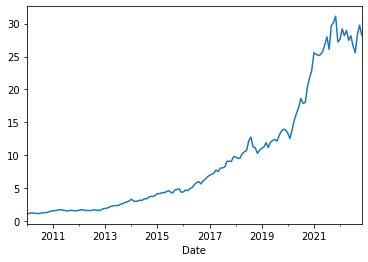

In [87]:
returns = []

for d in mtl.index[12:-1]:
  # print(f'Try {d} {type(d)} {str(d.date())}')
  returns.append(portfolio_performance(d))#str(d.date())))

pd.Series(returns, index=mtl.index[12:-1]).cumprod().plot()



